# Capstone Problem Statement:

Real estate market trend analysis to predict real estate market demand, property value such as buying/selling prices and property rent prices.



## Data source

Dataset is **Housing Price Dataset** from Kaggle [link](https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset).  



In [887]:
# import required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import set_config
set_config(transform_output="pandas")

### Understanding the Data and Features

In [888]:
# Read and create dataframe for housing data
housing_df = pd.read_csv('Housing.csv')

In [889]:
# Look at the snapshot of the loaded data in dataframe
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [890]:
# look at the data information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [891]:
# Note the shape of the dataframe
housing_df.shape

(21613, 21)

In [892]:
# Note the description of the dataframe
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [893]:
# Check if any null values
housing_df.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [894]:
# check if any missing values
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [895]:
# Check if there are 0s as value
housing_df.eq(0).sum() /21613 * 100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.060149
bathrooms         0.046268
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       99.245824
view             90.172581
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement    60.731967
yr_built          0.000000
yr_renovated     95.771064
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [896]:
# Note the unique value counts for each column
housing_df.nunique()

id               21436
date               372
price             4029
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [897]:
# drop the date and id column as it's not directly affecting the house price
housing_df.drop(columns = ['id','date'], inplace = True)

# verify that the columns count is now dropped from 21 to 19.
housing_df.shape

(21613, 19)

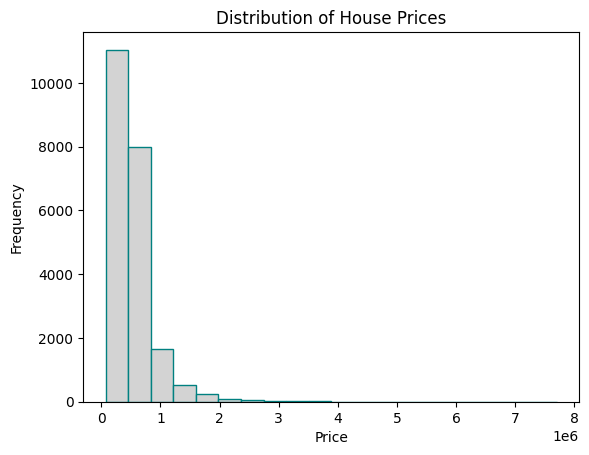

<Figure size 1500x1000 with 0 Axes>

In [898]:
# Visualize Price distribution for the housing dataset
housing_df['price'].plot(kind='hist', bins=20, color='lightgrey', edgecolor='teal')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.figure(figsize=(15, 10))
plt.show()

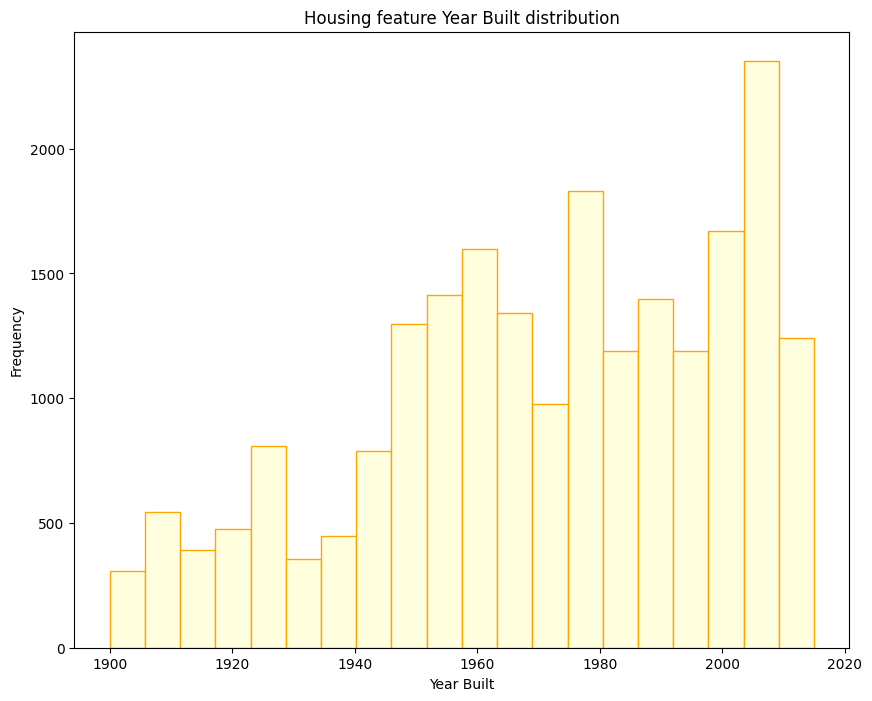

In [899]:
# Visualize yr_built feature
housing_df['yr_built'].plot(kind = 'hist',bins = 20, figsize=(10,8),color = 'lightyellow',edgecolor='orange' )
plt.title('Housing feature Year Built distribution')
plt.xlabel('Year Built')
plt.show()

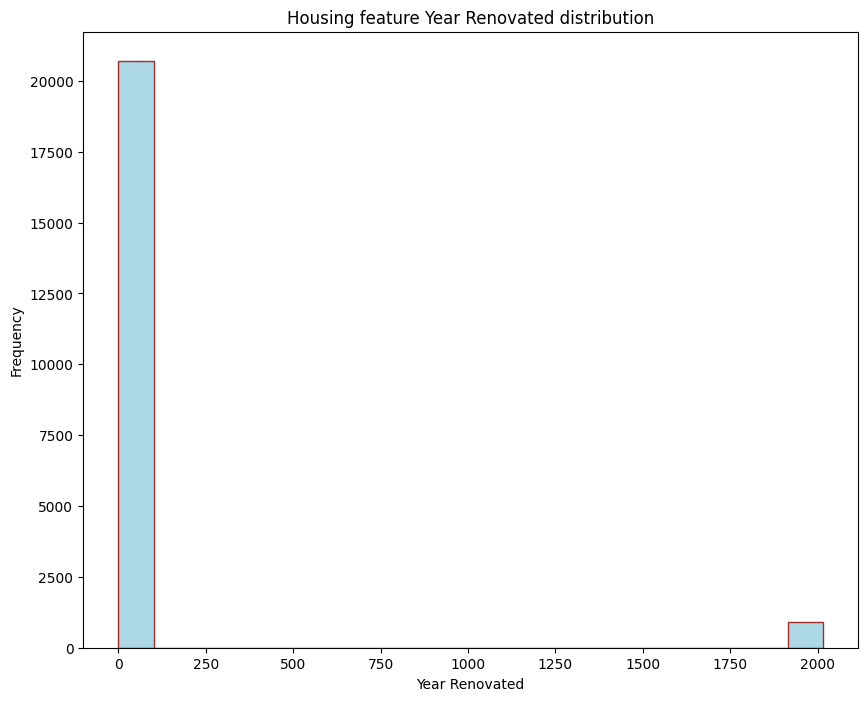

In [900]:
# Visualize yr_renovated feature
housing_df['yr_renovated'].plot(kind = 'hist',bins = 20, figsize=(10,8),color = 'lightblue',edgecolor='brown' )
plt.title('Housing feature Year Renovated distribution')
plt.xlabel('Year Renovated')
plt.show()

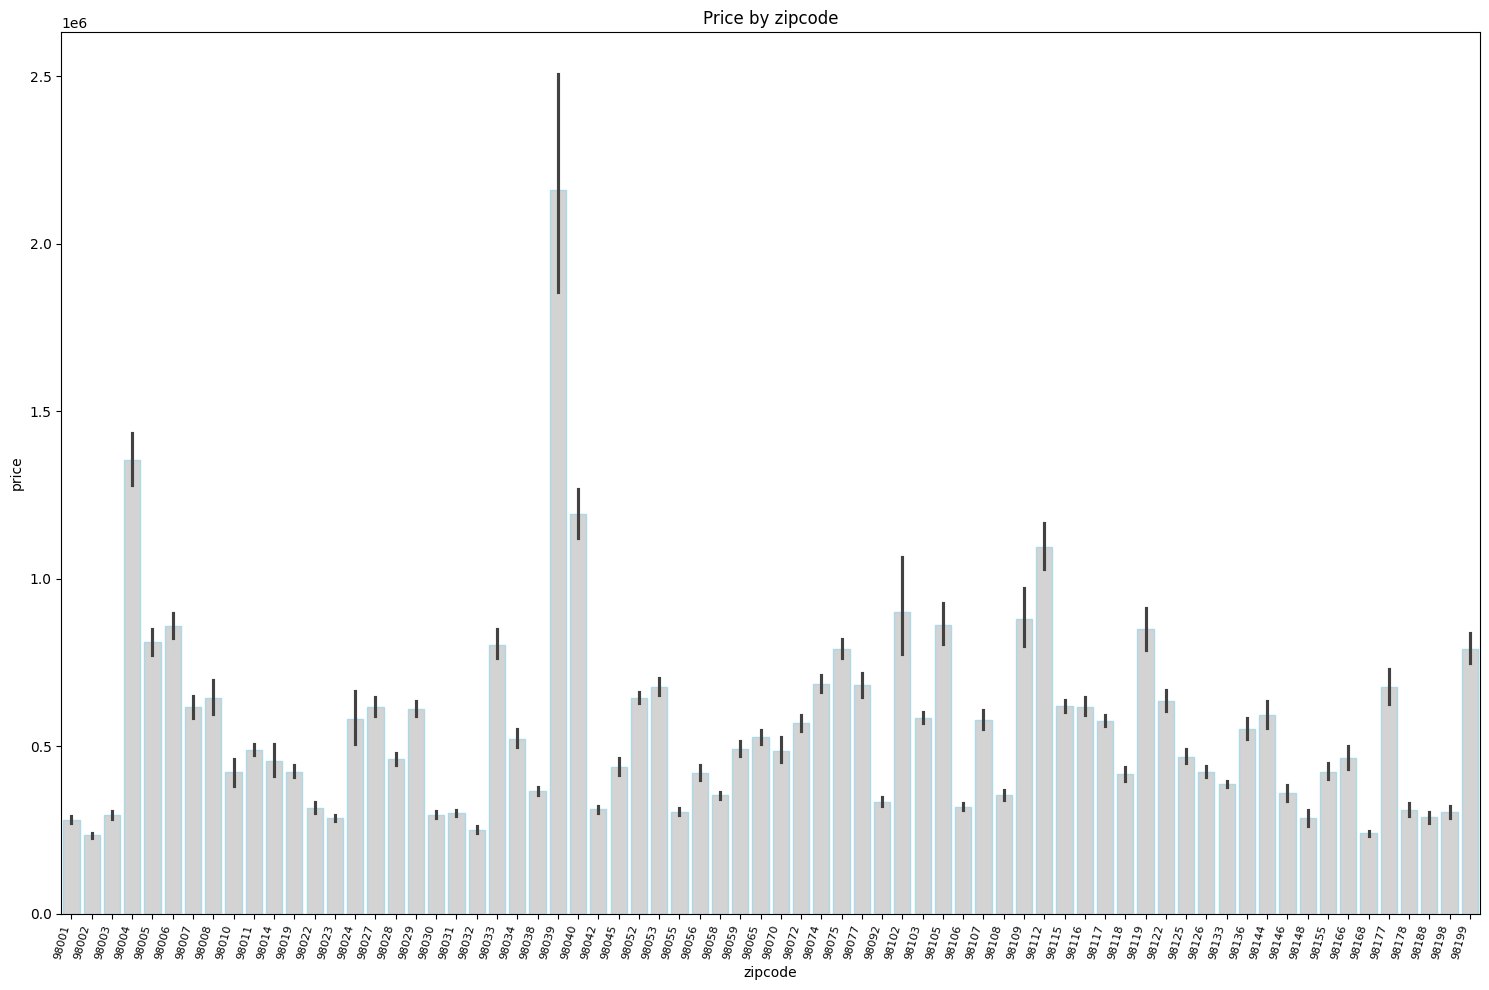

In [901]:
# Visualize price by zipcode feature
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='zipcode', y='price', data=housing_df,color = 'lightgrey',edgecolor='lightblue', ax=ax)
plt.title('Price by zipcode')
plt.xticks(rotation=75, ha='right',fontsize=8)
plt.tight_layout()
plt.show()

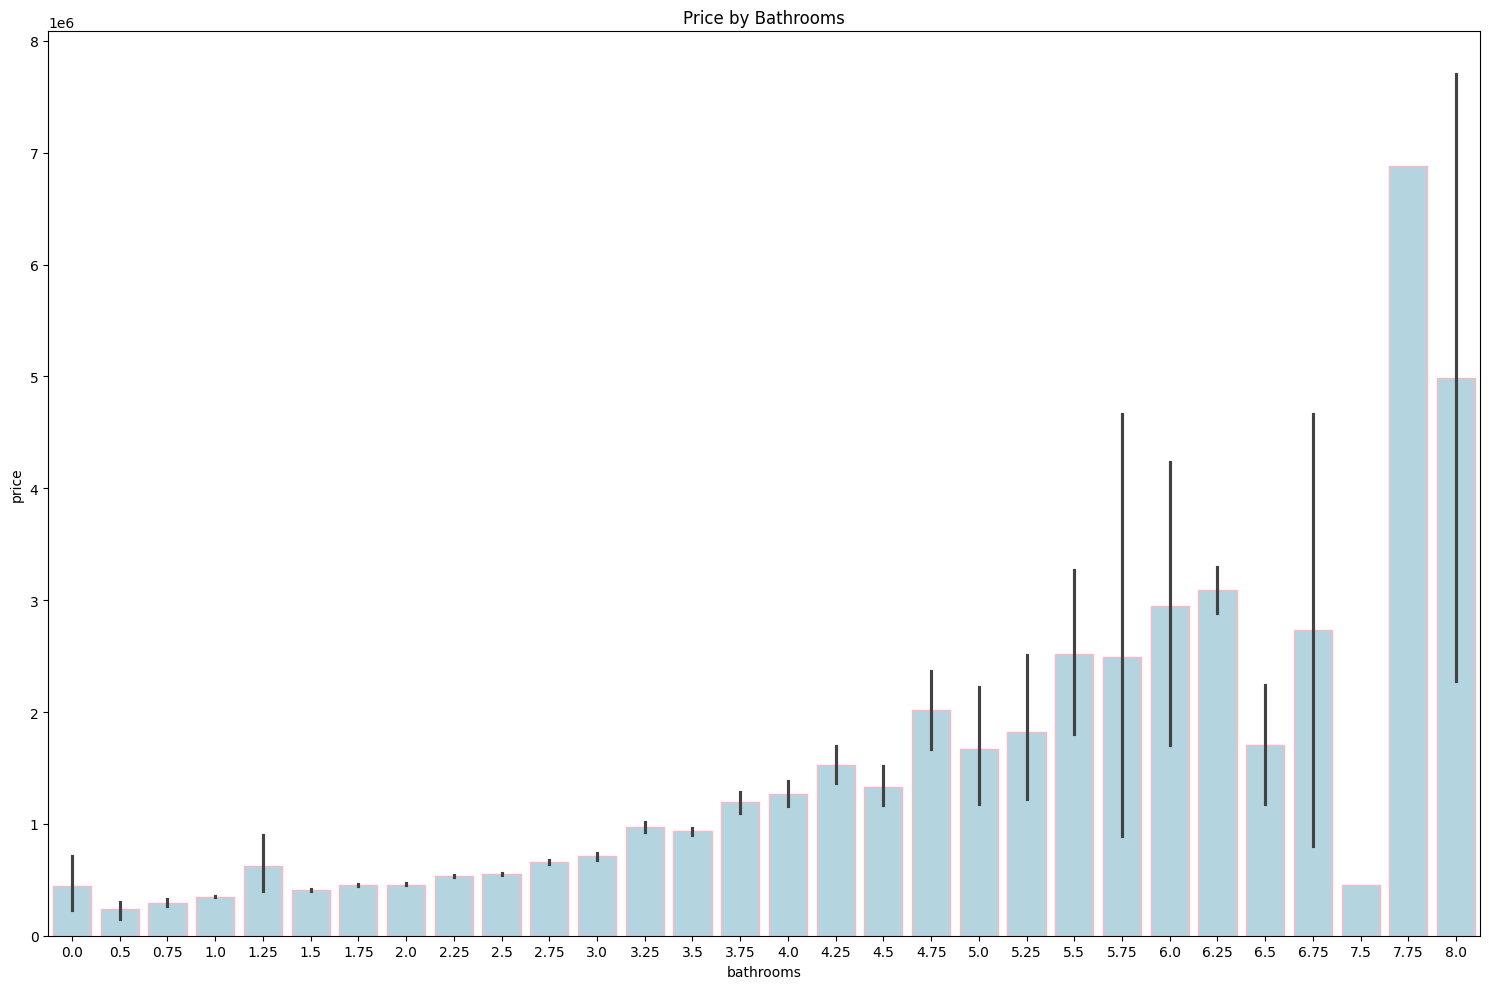

In [902]:
# Visualize price vs bathrooms feature
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='bathrooms', y='price', data=housing_df,color = 'lightblue',edgecolor='lightpink', ax=ax)
plt.title('Price by Bathrooms')
plt.tight_layout()
plt.show()

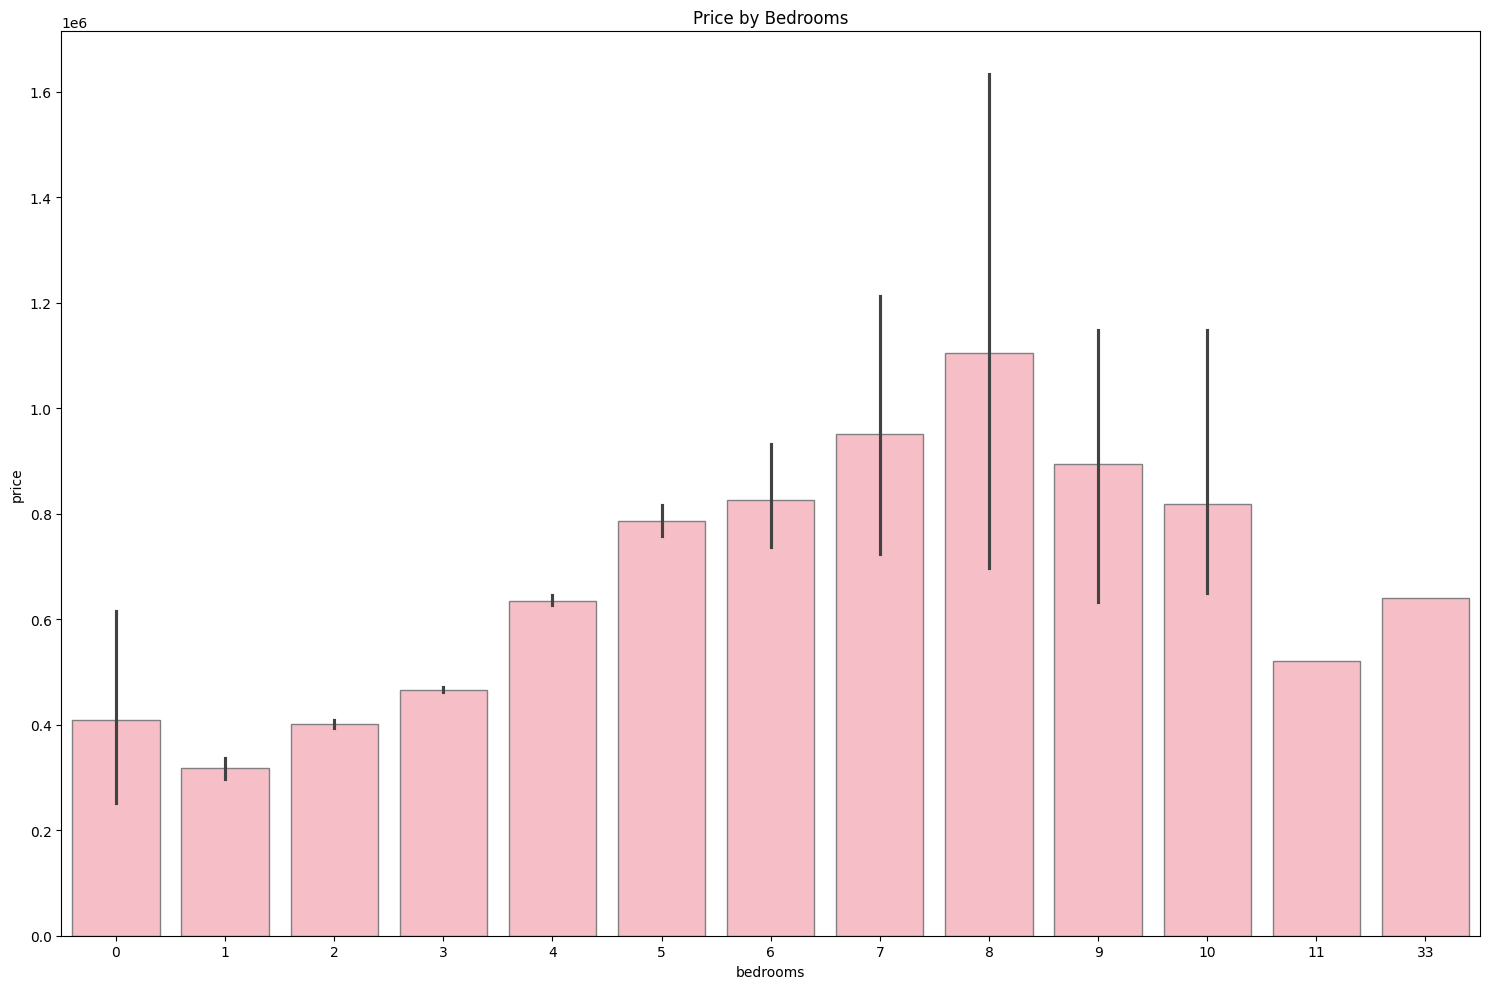

In [903]:
# Visualize price vs bedrooms feature
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='bedrooms', y='price', data=housing_df,color = 'lightpink',edgecolor='grey', ax=ax)
plt.title('Price by Bedrooms')
plt.tight_layout()
plt.show()

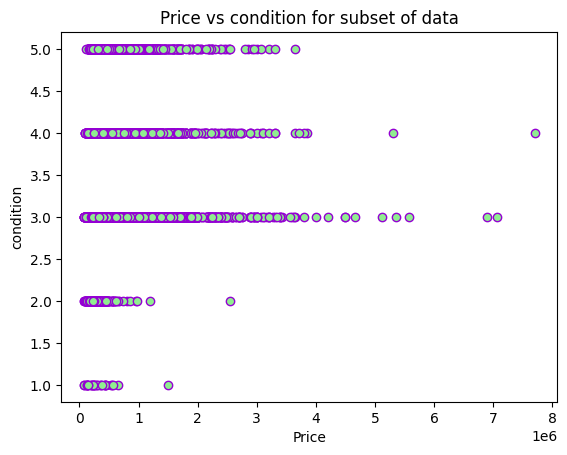

<Figure size 1500x1000 with 0 Axes>

In [904]:
# Visualize price vs condition(scaled from 1 to 5) for subset of data using Scatter Plot
plt.scatter(housing_df['price'], housing_df['condition'],color='lightgreen',edgecolor='darkviolet')
plt.xlabel('Price')
plt.ylabel('condition')
plt.title('Price vs condition for subset of data')
plt.figure(figsize=(15, 10))
plt.show()

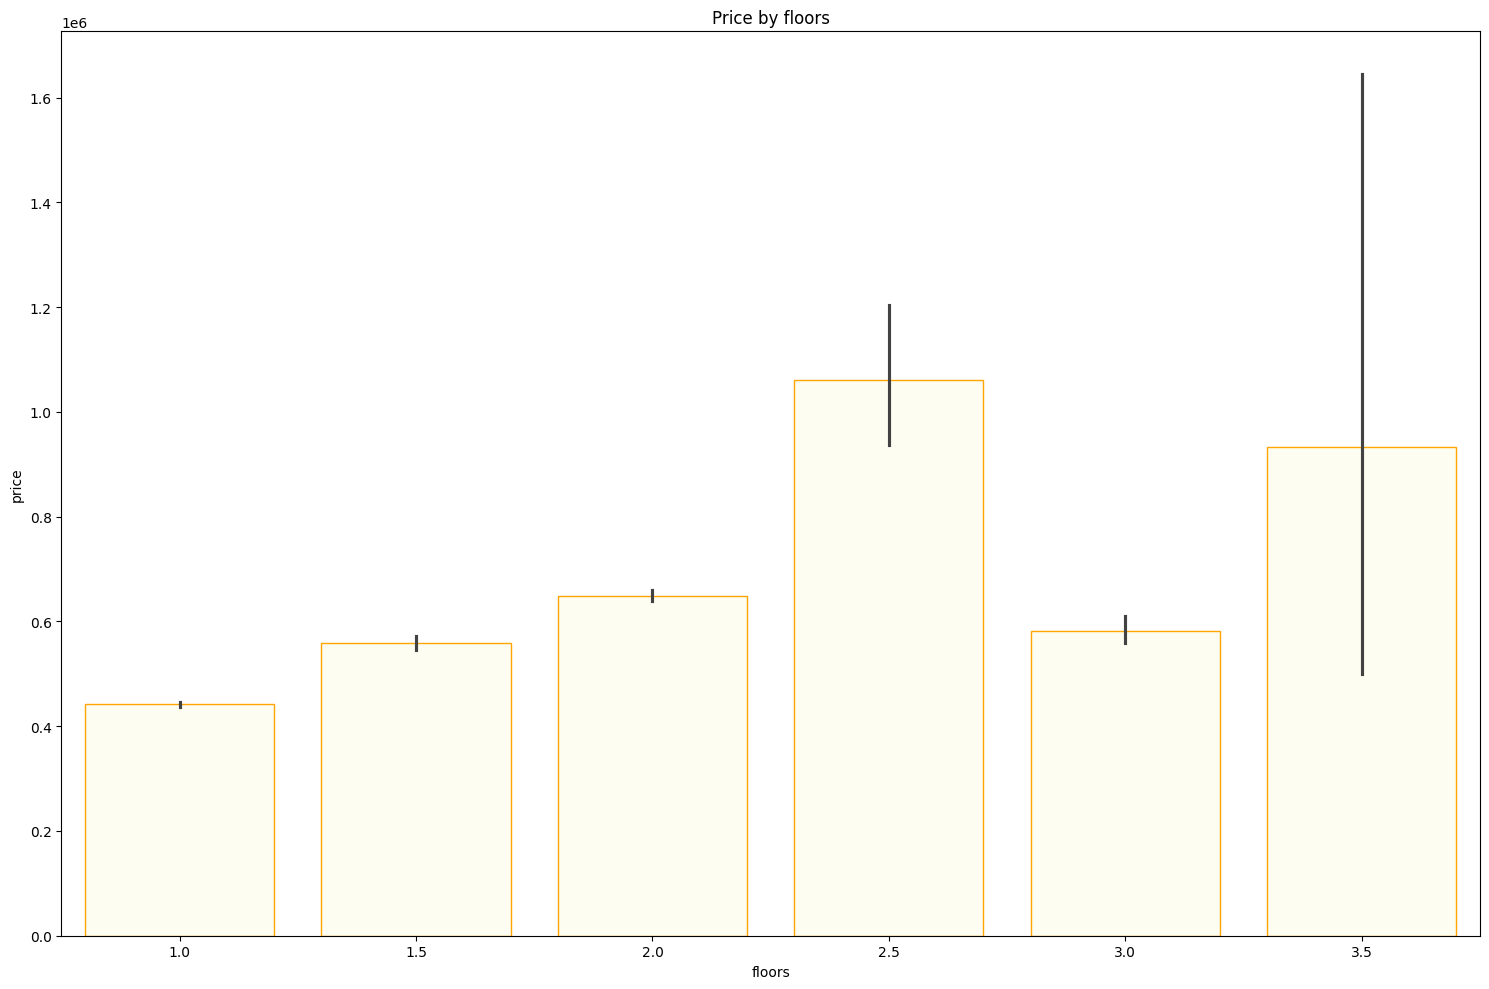

In [905]:
# Visualize price by floors
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='floors', y='price', data=housing_df,color = 'ivory',edgecolor='orange', ax=ax)
plt.title('Price by floors')
plt.tight_layout()
plt.show()

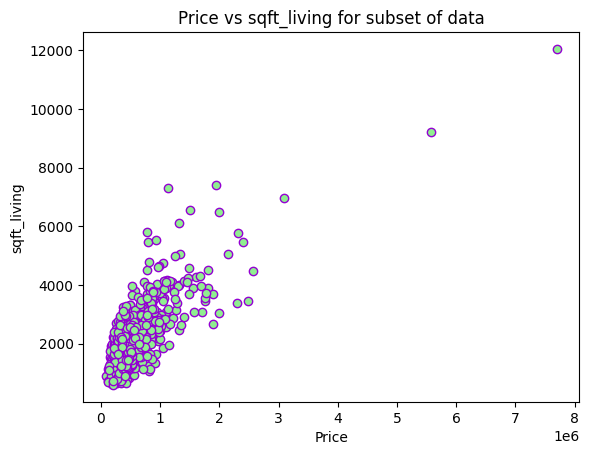

<Figure size 1500x1000 with 0 Axes>

In [906]:
# Visualize price vs sqft_living for subset of data using Scatter Plot
sample_size = 1000 
sampled_indices = random.sample(range(len(housing_df)), sample_size)
df_sampled = housing_df.iloc[sampled_indices]
plt.scatter(df_sampled['price'], df_sampled['sqft_living'],color='lightgreen',edgecolor='darkviolet')
plt.xlabel('Price')
plt.ylabel('sqft_living')
plt.title('Price vs sqft_living for subset of data')
plt.figure(figsize=(15, 10))
plt.show()

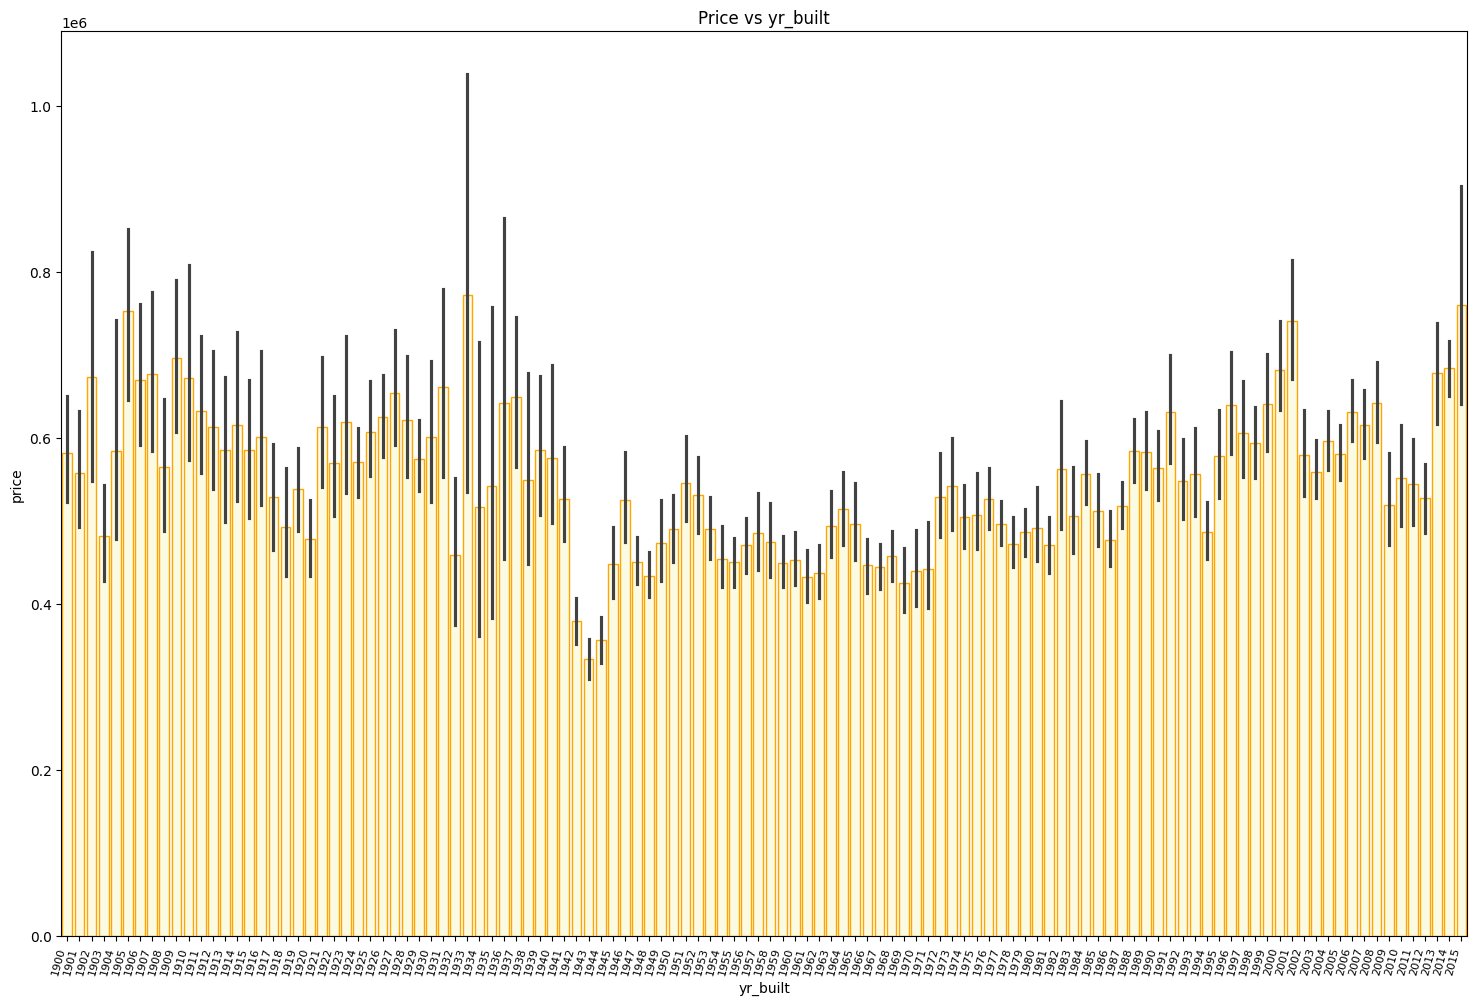

In [907]:
# Visualize price by yr_built
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='yr_built', y='price', data=housing_df,color = 'lightyellow',edgecolor='orange', ax=ax)
plt.title('Price vs yr_built')
plt.tight_layout()
plt.xticks(rotation=75, ha='right',fontsize=8)
plt.show()

<Axes: >

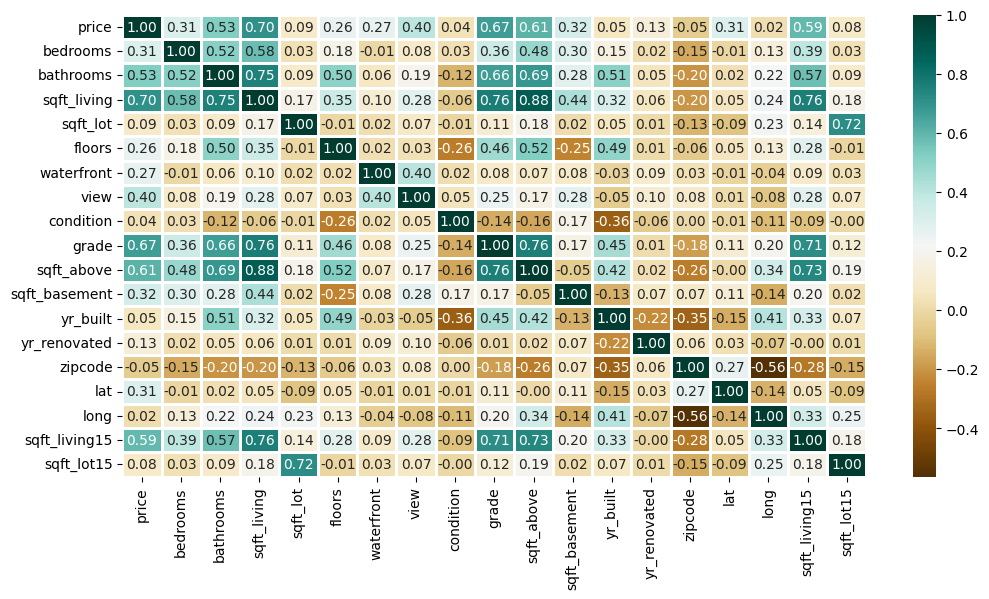

In [908]:
# Visualize correlation of all features for housing data
plt.figure(figsize=(12, 6))
sns.heatmap(housing_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


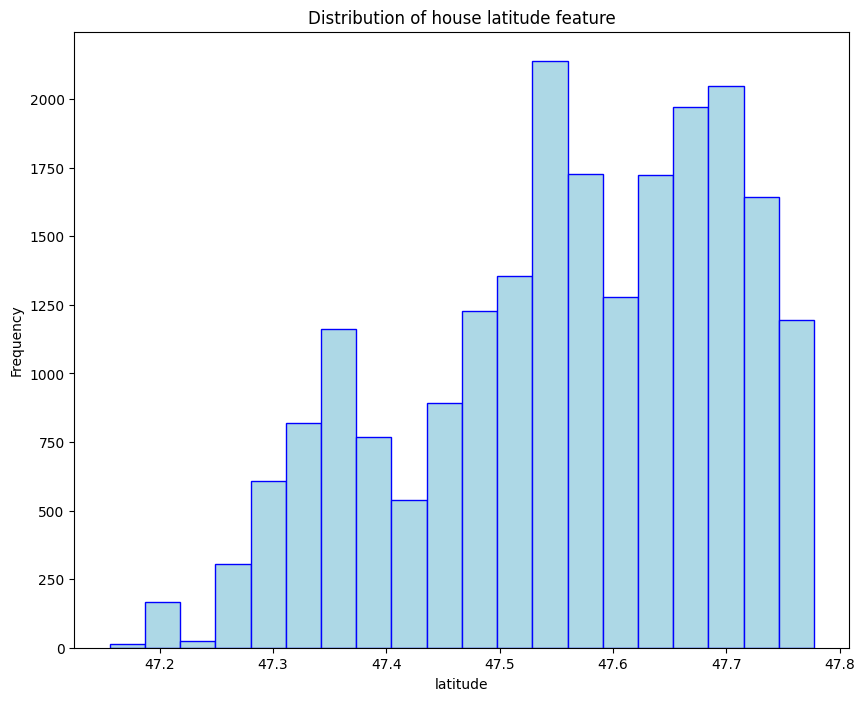

In [909]:
# Visualize distribution of house latitude feature
housing_df['lat'].plot(kind = 'hist',bins = 20, figsize=(10,8),color = 'lightblue',edgecolor='blue' )
plt.title('Distribution of house latitude feature')
plt.xlabel('latitude')
plt.show()

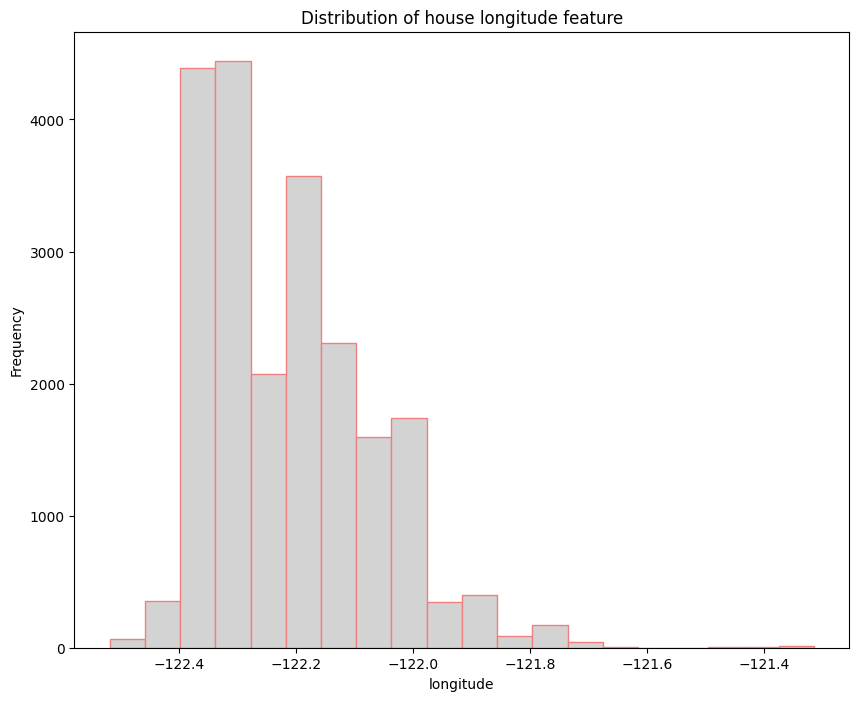

In [910]:
# Visualize distribution of house longitude feature
housing_df['long'].plot(kind = 'hist',bins = 20, figsize=(10,8),color = 'lightgrey',edgecolor='lightcoral')
plt.title('Distribution of house longitude feature')
plt.xlabel('longitude')
plt.show()

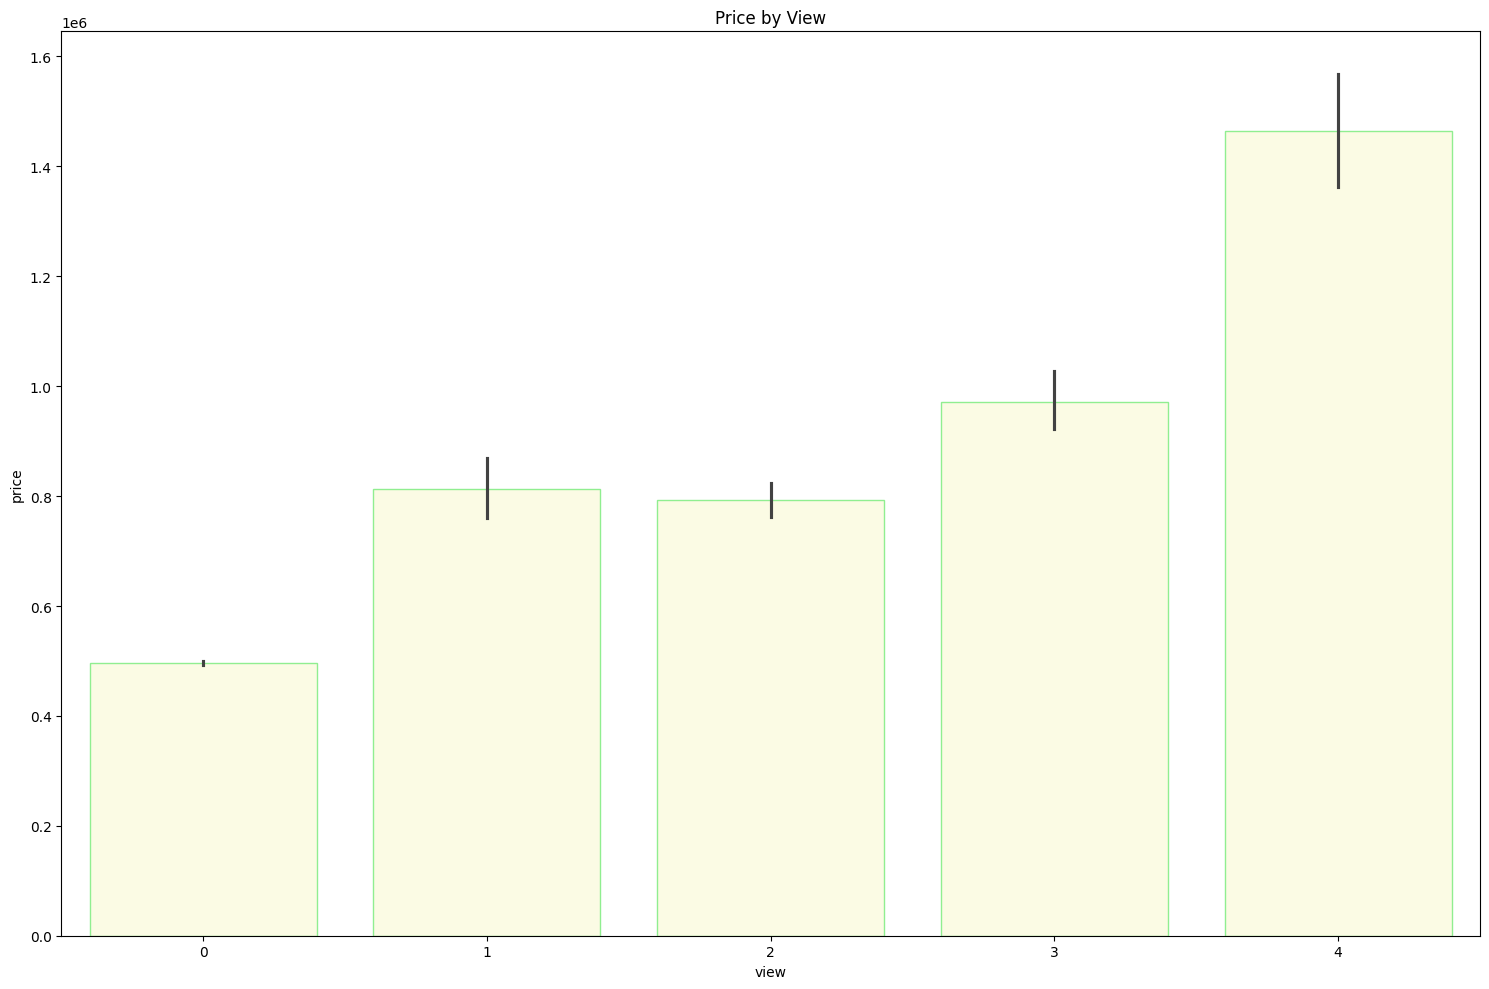

In [911]:
# Visualize price by view feature
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='view', y='price', data=housing_df,color = 'lightyellow',edgecolor='lightgreen', ax=ax)
plt.title('Price by View')
plt.tight_layout()
plt.show()

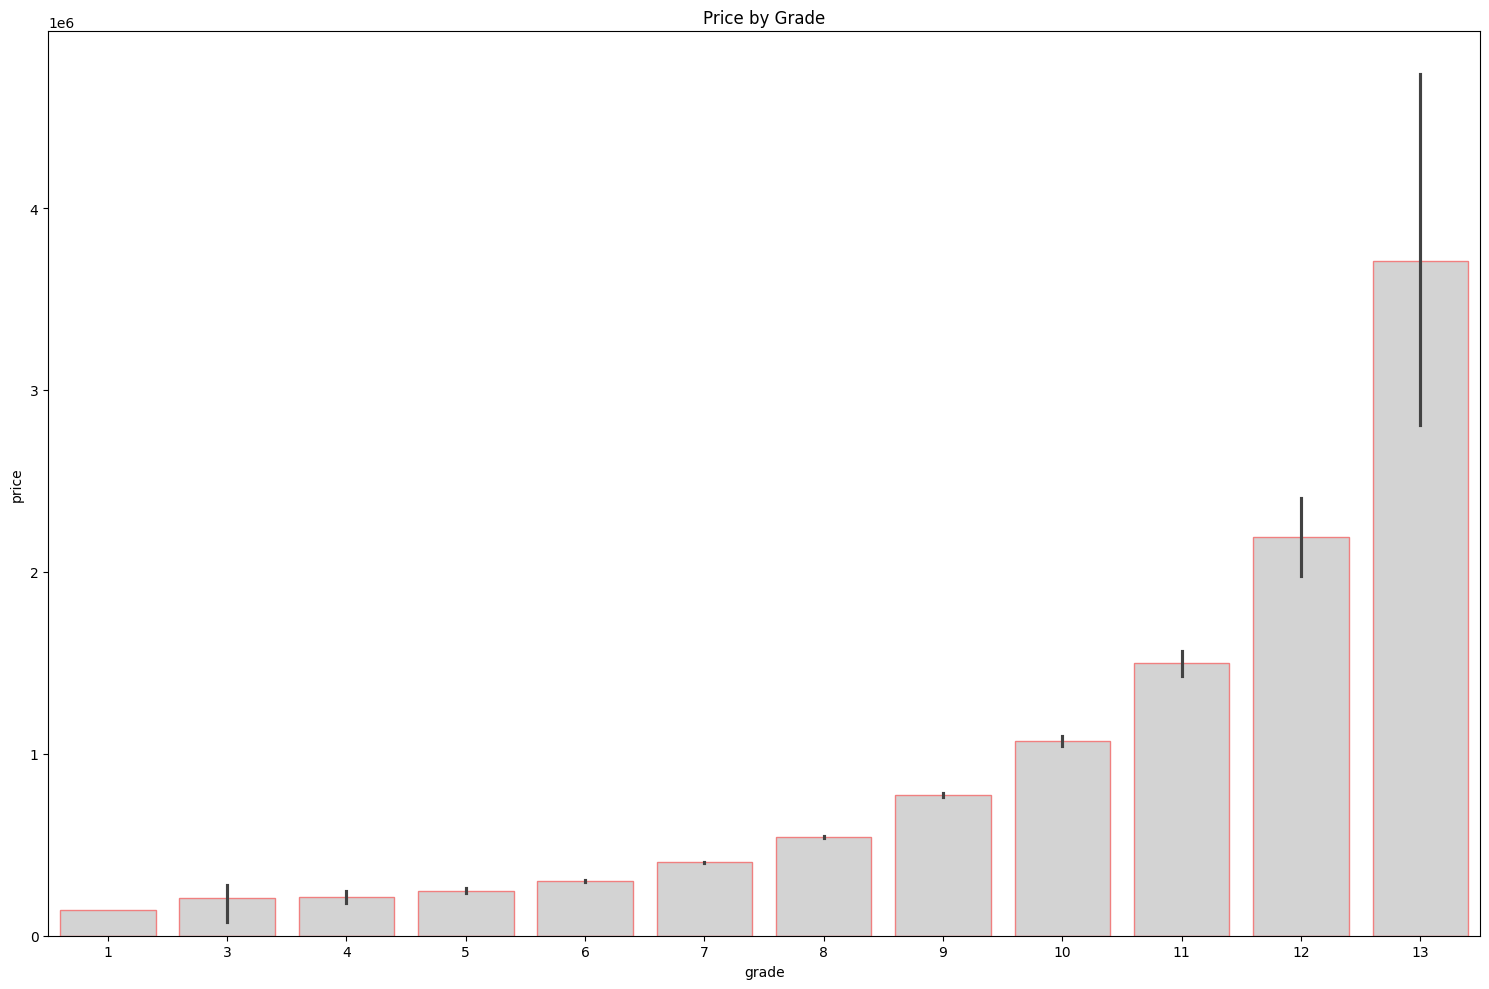

In [912]:
# Visualize price by grade
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='grade', y='price', data=housing_df,color = 'lightgrey',edgecolor='lightcoral', ax=ax)
plt.title('Price by Grade')
plt.tight_layout()
plt.show()

### Scaling the Features

In [913]:
# copy the original housing dataframe before making any changes to the data.
original_housing_df = housing_df.copy()

In [914]:
# Check the shape of the dataframe
original_housing_df.shape

(21613, 19)

In [915]:
# Set X and y data
X = housing_df.drop('price',axis = 1)
y = housing_df['price']

In [916]:
# Check the shape of the X data
X.shape

(21613, 18)

In [917]:
# scale numerical data
numerical_columns = X.select_dtypes(include=['float64','int64']).columns
numerical_columns_df = housing_df[numerical_columns]
print(numerical_columns_df.shape)
print(numerical_columns)

(21613, 18)
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [918]:
# use Standard Scalar to scale the numeric data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_columns_df)

In [919]:
# create scaled_numerical_data frame
scaled_dataframe = pd.DataFrame(scaled_numerical_data, columns=numerical_columns_df.columns)

In [920]:
# Look at the scaled dataframe
print(scaled_dataframe)

       bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0     -1.473841  -1.447464    -0.979835 -0.228321 -0.915427   -0.087173   
1     -0.398669   0.175607     0.533634 -0.189885  0.936506   -0.087173   
2     -1.473841  -1.447464    -1.426254 -0.123298 -0.915427   -0.087173   
3      0.676503   1.149449    -0.130550 -0.244014 -0.915427   -0.087173   
4     -0.398669  -0.149007    -0.435422 -0.169653 -0.915427   -0.087173   
...         ...        ...          ...       ...       ...         ...   
21608 -0.398669   0.500221    -0.598746 -0.337424  2.788439   -0.087173   
21609  0.676503   0.500221     0.250539 -0.224386  0.936506   -0.087173   
21610 -1.473841  -1.772078    -1.154047 -0.332137  0.936506   -0.087173   
21611 -0.398669   0.500221    -0.522528 -0.307076  0.936506   -0.087173   
21612 -1.473841  -1.772078    -1.154047 -0.338752  0.936506   -0.087173   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
0     -0.305759  -0.62

In [921]:
# Check the shape of the scaled features dataframe
scaled_dataframe.shape

(21613, 18)

In [922]:
# Assign scaled features dataframe as X
X = scaled_dataframe
X.shape

(21613, 18)

In [923]:
# Verify the scaled features information
scaled_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  float64
 3   sqft_lot       21613 non-null  float64
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  float64
 6   view           21613 non-null  float64
 7   condition      21613 non-null  float64
 8   grade          21613 non-null  float64
 9   sqft_above     21613 non-null  float64
 10  sqft_basement  21613 non-null  float64
 11  yr_built       21613 non-null  float64
 12  yr_renovated   21613 non-null  float64
 13  zipcode        21613 non-null  float64
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  float64
 17  sqft_lot15     21613 non-null  float64
dtypes: flo

### Train/Test Split

Now as the data is prepared, split it into a train and test set.

In [924]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(type(X_train), type(y_train))

(17290, 18)
(4323, 18)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>



## 1 - Linear Regression:  Build a Linear Regression model on housing data.


In [925]:
# Build LinearRegression model with default parameters
linereg = LinearRegression()

# Train and predict using LinearRegression model
linereg.fit(X_train, y_train)
lr_pred = linereg.predict(X_test)

# Calculate Error metrics
all_lr_mse = mean_squared_error(y_test,lr_pred)
all_lr_rmse = np.sqrt(all_lr_mse)
all_lr_mae = mean_absolute_error(y_test,lr_pred)
all_lr_r2 = r2_score(y_test,lr_pred)

# Print Error metrics
print('Linear regression with all the features')
print('-' * 85)
print(f'Mean Squared Error      : {all_lr_mse}')
print(f'Root Mean Squared Error : {all_lr_rmse}')
print(f'Mean Absolute Error     : {all_lr_mae}')
print(f'R2 score                : {all_lr_r2}')


Linear regression with all the features
-------------------------------------------------------------------------------------
Mean Squared Error      : 45173027114.56301
Root Mean Squared Error : 212539.47189772307
Mean Absolute Error     : 127493.63027966078
R2 score                : 0.7011905706891426


### Optimize Linear Regression with Polynomial features and Sequential feature selection

In [926]:
# Optimize linear regression with the Polynomial features and Sequential feature selection.

# Create LinearRegression optimal pipeline
LinearRegression_optimal_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
    ('selector',SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=7,
                                    scoring = 'neg_mean_squared_error')),
    ('linreg', LinearRegression())
])

# Train LinearRegression optimal pipeline
LinearRegression_optimal_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=7,
                                           scoring='neg_mean_squared_error')),
                ('linreg', LinearRegression())])

### Calculate error metrics for optimized Linear Regression

In [927]:
# Predict using LinearRegression_optimal_pipeline created above
lr_pred_optimal = LinearRegression_optimal_pipeline.predict(X_test)

# Calculate Error metrics
optimal_lr_mse = mean_squared_error(y_test,lr_pred_optimal)
optimal_lr_rmse = np.sqrt(optimal_lr_mse)
optimal_lr_mae = mean_absolute_error(y_test,lr_pred_optimal)
optimal_lr_r2 = r2_score(y_test,lr_pred_optimal)

# Print Error metrics
print('Linear regression with Polynomial features and Sequential Selector')
print('-' * 85)
print(f'Mean Squared Error      : {optimal_lr_mse}')
print(f'Root Mean Squared Error : {optimal_lr_rmse}')
print(f'Mean Absolute Error     : {optimal_lr_mae}')
print(f'R2 score                : {optimal_lr_r2}')

Linear regression with Polynomial features and Sequential Selector
-------------------------------------------------------------------------------------
Mean Squared Error      : 44412137857.097916
Root Mean Squared Error : 210741.87494918497
Mean Absolute Error     : 123902.61244833966
R2 score                : 0.706223682245189


## 2 - KNN: Build KNeighborsRegressor model on housing data

In [928]:
# Build a KNN model with n_neighbors=5
knn_model = KNeighborsRegressor(n_neighbors=5)

# train and predict using the model
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)

# Calculate Error metrics
knn_mse = mean_squared_error(y_test,knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test,knn_pred)
knn_r2_score = r2_score(y_test,knn_pred)

# Print Error metrics
print('KNeighborsRegressor error metrics with n_neighbors=5')
print('-' * 85)
print(f'Mean Squared Error      : {knn_mse}')
print(f'Root Mean Squared Error : {knn_rmse}')
print(f'Mean Absolute Error     : {knn_mae}')
print(f'R2 score                : {knn_r2_score}')

KNeighborsRegressor error metrics with n_neighbors=5
-------------------------------------------------------------------------------------
Mean Squared Error      : 33232944590.348
Root Mean Squared Error : 182299.05263151534
Mean Absolute Error     : 93106.56146194771
R2 score                : 0.7801715350583652


### KNN hyperparameter tuning using GridSearchCV

In [929]:
# Tune KNeighborsRegressor hyperparameters

# Create KNeighborsRegressor model
knn = KNeighborsRegressor()

# Create params grid for KNN model tuning
knn_params = {'n_neighbors': list(range(1, 22, 2)),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan']}

# Crete KNN grid using GridSearchCV
knn_grid = GridSearchCV(knn, param_grid=knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train using the KNN grid
knn_grid.fit(X_train, y_train)

# Use the best params and best score results from the KNN GridSearchCV run
knn_best_params = knn_grid.best_params_
knn_best_score = knn_grid.best_score_

# Print the KNeighborsRegressor Grid Search Results
print('KNeighborsRegressor Grid Search Results')
print('-' * 85)
print(f'best_params     : {knn_best_params}')
print(f'best_score      : {knn_best_score}')

KNeighborsRegressor Grid Search Results
-------------------------------------------------------------------------------------
best_params     : {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
best_score      : -23790646018.501953


### Optimize KNN using above GridSearchCV best params results

In [930]:
# Build KNN model with Grid Search best params : {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
knn_optimal_model = KNeighborsRegressor(n_neighbors=7, weights='distance', metric='manhattan')

# Train the optimal model
knn_optimal_model.fit(X_train,y_train)

# Predict using the optimal model
knn_optimal_pred = knn_optimal_model.predict(X_test)

# Calculate Error metrics
knn_optimal_mse = mean_squared_error(y_test,knn_optimal_pred)
knn_optimal_rmse = np.sqrt(knn_optimal_mse)
knn_optimal_mae = mean_absolute_error(y_test,knn_optimal_pred)
knn_optimal_r2_score = r2_score(y_test,knn_optimal_pred)

# Print Error metrics
print('KNeighborsRegressor error metrics with Grid Search best params: ')
print('-' * 85)
print(f'Mean Squared Error      : {knn_optimal_mse}')
print(f'Root Mean Squared Error : {knn_optimal_rmse}')
print(f'Mean Absolute Error     : {knn_optimal_mae}')
print(f'R2 score                : {knn_optimal_r2_score}')

KNeighborsRegressor error metrics with Grid Search best params: 
-------------------------------------------------------------------------------------
Mean Squared Error      : 27805070629.879116
Root Mean Squared Error : 166748.52512055126
Mean Absolute Error     : 86369.53746909919
R2 score                : 0.8160757023036924


## 3 - Random Forest: Build a Random Forest Regressor model on housing data

In [931]:
# Build Random forest model with default parameters
random_forest_model = RandomForestRegressor()

# Train the model
random_forest_model.fit(X_train,y_train)

# Predict using the random forest model
random_forest_pred = random_forest_model.predict(X_test)

# Calculate Error metrics
random_forest_mse = mean_squared_error(y_test,random_forest_pred)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_mae = mean_absolute_error(y_test,random_forest_pred)
random_forest_r2_score = r2_score(y_test,random_forest_pred)

# Print Error metrics
print('RandomForestRegressor error metrics')
print('-' * 85)
print(f'Mean Squared Error      : {random_forest_mse}')
print(f'Root Mean Squared Error : {random_forest_rmse}')
print(f'Mean Absolute Error     : {random_forest_mae}')
print(f'R2 score                : {random_forest_r2_score}')

RandomForestRegressor error metrics
-------------------------------------------------------------------------------------
Mean Squared Error      : 22025657477.1943
Root Mean Squared Error : 148410.435876977
Mean Absolute Error     : 73261.55500604739
R2 score                : 0.8543052223561283


### RandomForestRegressor hyperparameter tuning using GridSearchCV

In [932]:
# Tune RandomForestRegressor hyperparameters

# Create RandomForestRegressor model
random_forest = RandomForestRegressor()

# Create params grid
random_forest_params = {'n_estimators': [100,500]}

# Create random_forest grid using GridSearchCV
random_forest_grid = GridSearchCV(random_forest, param_grid=random_forest_params, cv=5, scoring='neg_mean_squared_error')

# Train the grid
random_forest_grid.fit(X_train, y_train)

# Use the best params, best score and best_estimator results from the random forest GridSearchCV run
random_forest_best_params = random_forest_grid.best_params_
random_forest_best_estimator = random_forest_grid.best_estimator_
random_forest_best_score = random_forest_grid.best_score_

# Print RandomForestRegressor Grid Search Results
print('RandomForestRegressor Grid Search Results')
print('-' * 85)
print(f'best_params     : {random_forest_best_params}')
print(f'best_score      : {random_forest_best_score}')
print(f'best_estimator  : {random_forest_best_estimator}')

RandomForestRegressor Grid Search Results
-------------------------------------------------------------------------------------
best_params     : {'n_estimators': 500}
best_score      : -15997457443.83073
best_estimator  : RandomForestRegressor(n_estimators=500)


### Optimize RandomForestRegressor using above GridSearchCV best params results

In [933]:
# Build Random forest optimal model with grid search best params
random_forest_optimal_model = RandomForestRegressor(n_estimators=500)

# Train the Random forest optimal model
random_forest_optimal_model.fit(X_train,y_train)

# Predict using the Random forest optimal model
random_forest_optimal_pred = random_forest_optimal_model.predict(X_test)

# Calculate Error metrics
random_forest_optimal_mse = mean_squared_error(y_test,random_forest_optimal_pred)
random_forest_optimal_rmse = np.sqrt(random_forest_optimal_mse)
random_forest_optimal_mae = mean_absolute_error(y_test,random_forest_optimal_pred)
random_forest_optimal_r2_score = r2_score(y_test,random_forest_optimal_pred)

# Print Error metrics
print('RandomForestRegressor error metrics with Grid seach best params')
print('-' * 85)
print(f'Mean Squared Error      : {random_forest_optimal_mse}')
print(f'Root Mean Squared Error : {random_forest_optimal_rmse}')
print(f'Mean Absolute Error     : {random_forest_optimal_mae}')
print(f'R2 score                : {random_forest_optimal_r2_score}')

RandomForestRegressor error metrics with Grid seach best params
-------------------------------------------------------------------------------------
Mean Squared Error      : 21135172261.503517
Root Mean Squared Error : 145379.40796929775
Mean Absolute Error     : 72408.59177884331
R2 score                : 0.860195582070909


## 4 - XGBoost: Build a XGBRegressor model on housing data

In [934]:
# Buld XGBRegressor model with following initial parameter values : n_estimators=100, learning_rate = 0.1, random_state=42
XGBRegressor_model = XGBRegressor(n_estimators=100, learning_rate = 0.1, random_state=42)

# Train the XGBRegressor model
XGBRegressor_model.fit(X_train,y_train)

# Predict using the XGBRegressor model
XGBRegressor_pred = XGBRegressor_model.predict(X_test)

# Calculate Error metrics
XGBRegressor_mse = mean_squared_error(y_test,XGBRegressor_pred)
XGBRegressor_rmse = np.sqrt(XGBRegressor_mse)
XGBRegressor_mae = mean_absolute_error(y_test,XGBRegressor_pred)
XGBRegressor_r2_score = r2_score(y_test,XGBRegressor_pred)

# Print Error metrics
print('XGBRegressor error metrics with n_estimators=100, learning_rate = 0.1, random_state=42 : ')
print('-' * 85)
print(f'Mean Squared Error      : {XGBRegressor_mse}')
print(f'Root Mean Squared Error : {XGBRegressor_rmse}')
print(f'Mean Absolute Error     : {XGBRegressor_mae}')
print(f'R2 score                : {XGBRegressor_r2_score}')

XGBRegressor error metrics with n_estimators=100, learning_rate = 0.1, random_state=42 : 
-------------------------------------------------------------------------------------
Mean Squared Error      : 18695536992.921875
Root Mean Squared Error : 136731.6239679829
Mean Absolute Error     : 70527.42302437543
R2 score                : 0.8763332214742358


### XGBRegressor hyperparameter tuning using GridSearchCV

In [935]:
# Create XGBRegressor model
xgb = XGBRegressor(random_state=42)

# Create param grid for XGBRegressor
xgb_regressor_grid = {
    'n_estimators':[100,300, 500, 1000],
    'learning_rate':[0.1,0.2],
    'max_depth':[5,7]
}

# Create XGBRegressor grid using GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_regressor_grid, scoring='neg_mean_squared_error', cv=5, n_jobs = -1, verbose=1)

# Train the grid
xgb_grid.fit(X_train,y_train)

# Use the best params, best score and best_estimator results from the XGBRegressor GridSearchCV run
xgb_best_params = xgb_grid.best_params_
xgb_best_estimator = xgb_grid.best_estimator_
xgb_best_score = xgb_grid.best_score_

# Print the best params, best score and best_estimator results from the XGBRegressor GridSearchCV run
print('XGBRegressor Grid Search Results')
print('-' * 85)
print(f'best_params     : {xgb_best_params}')
print(f'best_score      : {xgb_best_score}')
print(f'best_estimator  : {xgb_best_estimator}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGBRegressor Grid Search Results
-------------------------------------------------------------------------------------
best_params     : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
best_score      : -13553572512.054585
best_estimator  : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=

### Optimize XGBRegressor using above GridSearchCV best params results

In [936]:
# Build XGBRegressor model with Grid search tuned parameter values : n_estimators=1000, learning_rate = 0.1, max_depth=5
XGBRegressor_optimal_model = XGBRegressor(n_estimators=1000, learning_rate = 0.1, max_depth=5, random_state=42)

# Train the optimal XGBRegressor model
XGBRegressor_optimal_model.fit(X_train,y_train)

# Predict using the optimal XGBRegressor model
XGBRegressor_optimal_pred = XGBRegressor_optimal_model.predict(X_test)

# Calculate Error metrics
XGBRegressor_optimal_mse = mean_squared_error(y_test,XGBRegressor_optimal_pred)
XGBRegressor_optimal_rmse = np.sqrt(XGBRegressor_optimal_mse)
XGBRegressor_optimal_mae = mean_absolute_error(y_test,XGBRegressor_optimal_pred)
XGBRegressor_optimal_r2_score = r2_score(y_test,XGBRegressor_optimal_pred)

# Print Error metrics
print('XGBRegressor error metrics with Grid Seach best params: ')
print('-' * 85)
print(f'Mean Squared Error      : {XGBRegressor_optimal_mse}')
print(f'Root Mean Squared Error : {XGBRegressor_optimal_rmse}')
print(f'Mean Absolute Error     : {XGBRegressor_optimal_mae}')
print(f'R2 score                : {XGBRegressor_optimal_r2_score}')

XGBRegressor error metrics with Grid Seach best params: 
-------------------------------------------------------------------------------------
Mean Squared Error      : 17749980863.95474
Root Mean Squared Error : 133229.0541284248
Mean Absolute Error     : 66994.11033642726
R2 score                : 0.8825878629123998


## Determine Feature importance for all the above regression models

In [937]:
### Feature importance for Linear regression
selected_features = LinearRegression_optimal_pipeline.named_steps['selector'].get_feature_names_out()
print(selected_features)
print(type(selected_features))

['sqft_living' 'grade' 'yr_built' 'lat' 'sqft_living grade' 'view^2'
 'yr_built sqft_living15']
<class 'numpy.ndarray'>


### Feature importance as per KNeighborsRegressor model run

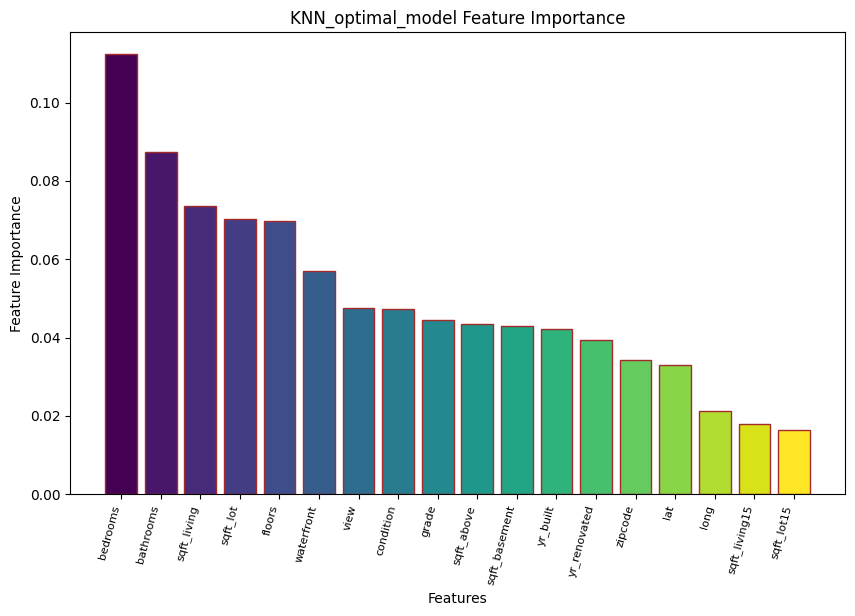

In [938]:
### Feature importance for KNN regressor

# Calculate permutation importance
perm_importance = permutation_importance(knn_optimal_model, X, y, n_repeats=10, random_state=42)
knn_feature_importance = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

feature_names = X.columns
knn_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': knn_feature_importance})
knn_importance_df = knn_importance_df.sort_values(by='Importance', ascending=False)

knn_colors = plt.cm.viridis(np.linspace(0, 1, len(knn_importance_df)))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(knn_importance_df['Feature'], knn_importance_df['Importance'],color=knn_colors, edgecolor='brown')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('KNN_optimal_model Feature Importance')
plt.xticks(rotation=75, ha='right',fontsize=8)
plt.show()

### Feature importance as per RandomForestRegressor model run

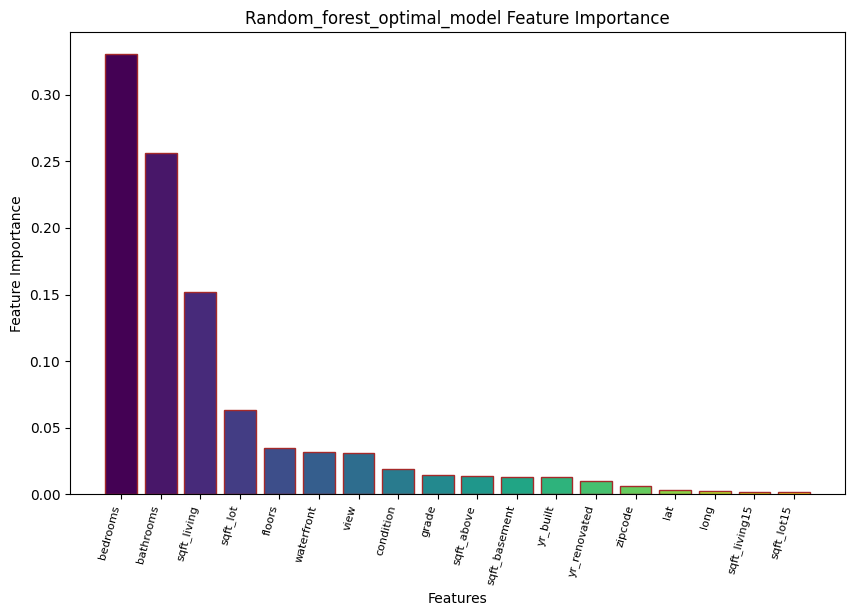

In [939]:
### Feature importance for Random Forest regressor
random_forest_feature_importance = pd.Series(random_forest_optimal_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_names = X.columns
random_forest_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': random_forest_feature_importance})
random_forest_importance_df = random_forest_importance_df.sort_values(by='Importance', ascending=False)

random_forest_colors = plt.cm.viridis(np.linspace(0, 1, len(random_forest_importance_df)))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(random_forest_importance_df['Feature'], random_forest_importance_df['Importance'],color=random_forest_colors, edgecolor='brown')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random_forest_optimal_model Feature Importance')
plt.xticks(rotation=75, ha='right',fontsize=8)
plt.show()

### Feature importance as per XGBRegressor model run based on Gain

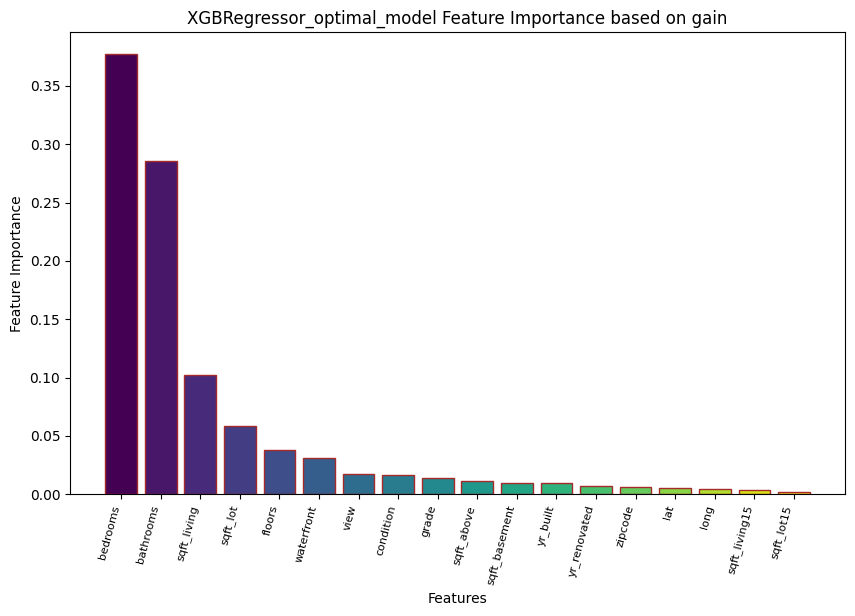

In [940]:
### Feature importance for XGBRegressor regressor based on gain
XGBRegressor_feature_importance = pd.Series(XGBRegressor_optimal_model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_names = X.columns
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': XGBRegressor_feature_importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

xgb_colors = plt.cm.viridis(np.linspace(0, 1, len(xgb_importance_df)))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(xgb_importance_df['Feature'], xgb_importance_df['Importance'],color=xgb_colors, edgecolor='brown')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('XGBRegressor_optimal_model Feature Importance based on gain')
plt.xticks(rotation=75, ha='right',fontsize=8)
plt.show()

### Feature importance as per XGBRegressor model run based on Weight

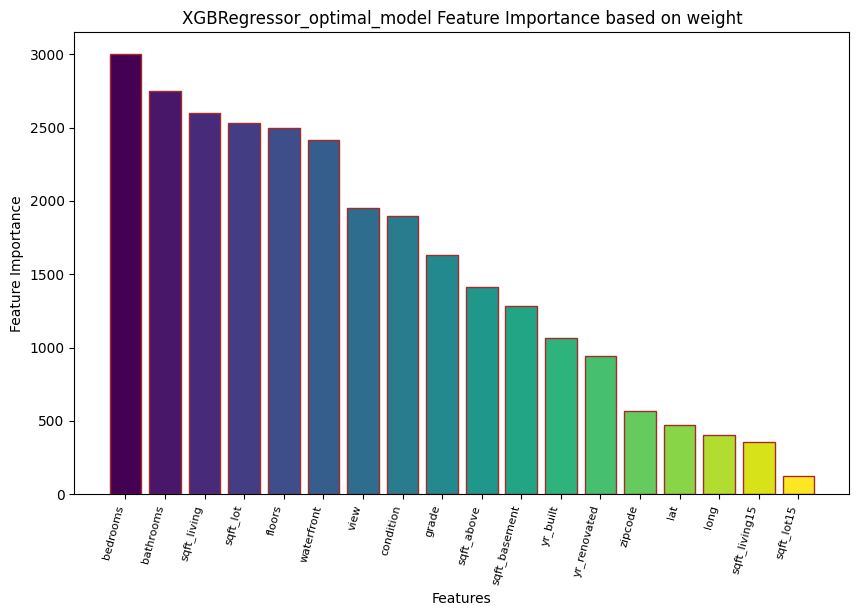

In [941]:
### Feature importance for XGBRegressor regressor based on weight
XGBRegressor_feature_importance_weight = pd.Series(XGBRegressor_optimal_model.get_booster().get_score(importance_type='weight'), index=X.columns).sort_values(ascending=False)

feature_names = X.columns
xgb_importance_base_weight_df = pd.DataFrame({'Feature': feature_names, 'Importance': XGBRegressor_feature_importance_weight})
xgb_importance_base_weight_df = xgb_importance_base_weight_df.sort_values(by='Importance', ascending=False)

xgb_base_weight_colors = plt.cm.viridis(np.linspace(0, 1, len(xgb_importance_base_weight_df)))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(xgb_importance_base_weight_df['Feature'], xgb_importance_base_weight_df['Importance'],color=xgb_base_weight_colors, edgecolor='brown')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('XGBRegressor_optimal_model Feature Importance based on weight')
plt.xticks(rotation=75, ha='right',fontsize=8)
plt.show()

## Plot Error metrics for the regression models run above for visual comparison

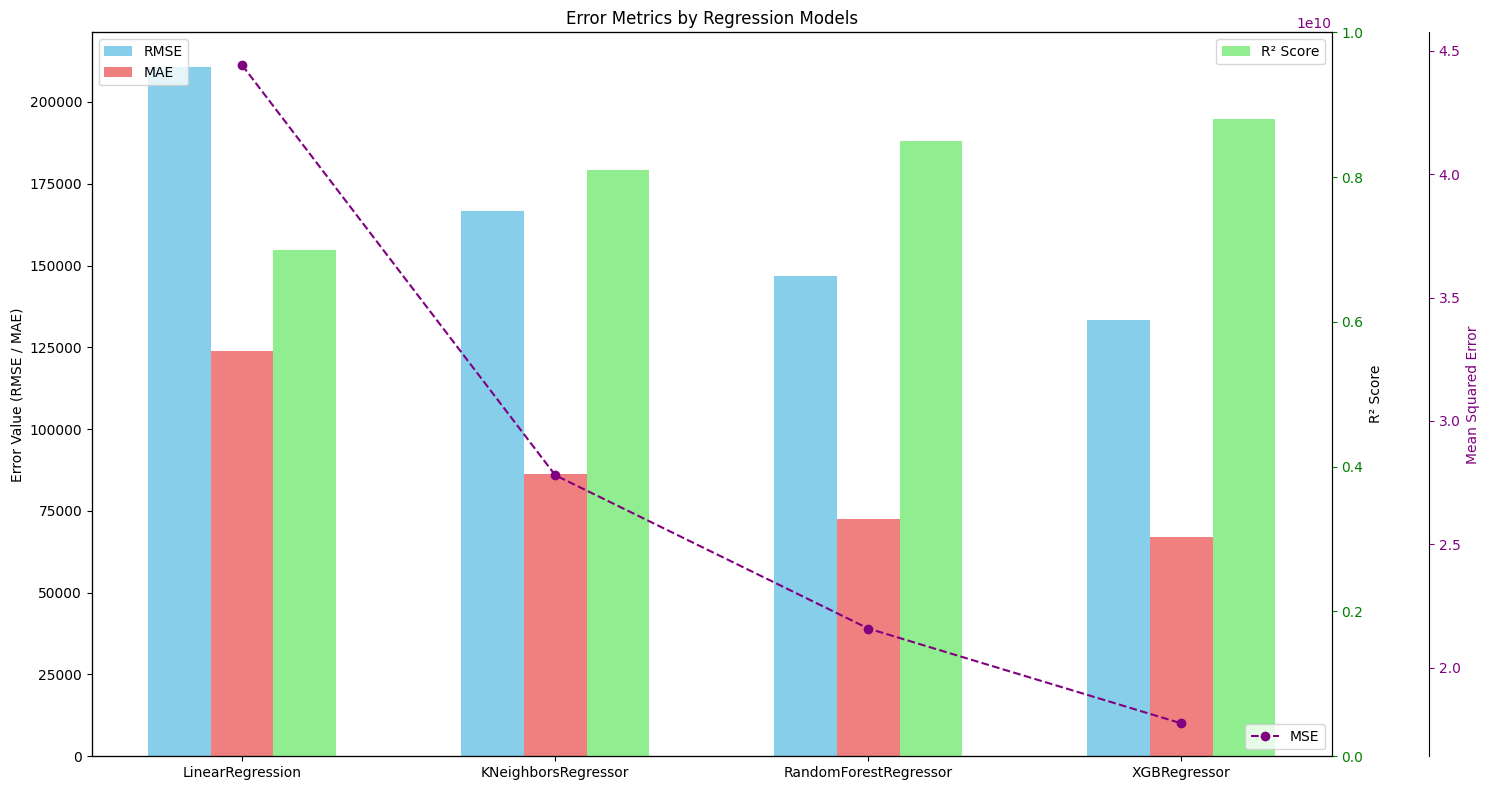

In [942]:
# Plot Error metrics for the regression models run above for visual comparison

# Create lists of model data and error metrics to plot
models_performance = ['LinearRegression', 'KNeighborsRegressor', 'RandomForestRegressor', 'XGBRegressor']
rmse_scores = [210741.87, 166748.53, 146945.26, 133229.05]
mae_scores = [123902.61, 86369.54, 72552.65, 66994.11]
mse_scores = [44412137857.10, 27805070629.88, 21592910306.59, 17749980863.95]
r2_scores = [0.70, 0.81, 0.85, 0.88]

# Plot settings for grouped plot of bar plots and line plot
bar_width = 0.2
x = np.arange(len(models_performance))

fig, ax1 = plt.subplots(figsize=(15, 8))

rmse_bars = ax1.bar(x - bar_width, rmse_scores, bar_width, label='RMSE', color='skyblue')
mae_bars = ax1.bar(x, mae_scores, bar_width, label='MAE', color='lightcoral')
ax1.set_ylabel('Error Value (RMSE / MAE)')
ax1.set_xticks(x)
ax1.set_xticklabels(models_performance)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
r2_bars = ax2.bar(x + bar_width, r2_scores, bar_width, label='R² Score', color='lightgreen')
ax2.set_ylabel('R² Score')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', colors='green')
ax2.legend(loc='upper right')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 70))
mse_bars = ax3.plot(x, mse_scores, marker='o', linestyle='--', color='purple', label='MSE')
ax3.set_ylabel('Mean Squared Error', color='purple')
ax3.tick_params(axis='y', colors='purple')
ax3.legend(loc='lower right')

plt.title('Error Metrics by Regression Models')
plt.tight_layout()
plt.show()
